# AWP PROJECT

## EDA On Superstore Sales Data
In this modern times where every business is highly dependent on its data to make better decisions for developing business. I have utilised the dataset to perform expolratory data analysis to gain valuable insights.

In [1]:
# Step1 : Import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step2: Read the csv file
df = pd.read_csv('train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
# Describe the dataset:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


Insights: Here we can see sales figures are increasing linearly but there is sudden increase at maximum value it means there might be some outliners in the dataset.

In [8]:
# Droping the ROW ID column:
df.drop('Row ID',axis = 1, inplace = True)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [10]:
#convert Order dates to pandas datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') 

#convert shipping dates to pandas datetime format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')   

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9789 non-null   float64       
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

Here we can see that datatype of both the columns are changed to pandas timestamp.

In [12]:
# Checking if there is any null data or not
print(df.isnull().sum())

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


To handle the null values in postal code. We will not drop them, instead we will add the postal code of respective city.for that we need to find the cities for which the postal code is not mentioned.and later we will fill the postal code of the respective city into the postal code column.

In [13]:
df[df['Postal Code'].isnull()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
5274,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
9741,CA-2016-117086,2016-11-08,2016-11-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",4404.90
9146,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
8798,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9386,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92


We can see that the postal code is not mentioned only for Burlington city in Vermont state. So, we need to fill the postal code of that city which is 5401.

In [15]:
df['Postal Code'] = df['Postal Code'].fillna(5401) 

# Now we will again check for null values
print(df.isnull().sum())

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


Now we can say that there is no null values in dataset and all the cleaned and now ready to explore more in deep.

### Let's find out who are the top 5 most Valuable customers:
The Most Valuable Customers are the customers who are the most profitable for a company.
These customers buy more or higher-value products than the average customer.

In [16]:
# Sort the Customers as per the sales
Top_customers = df.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(10)
# Round off the Sales Value up to 2 decimal places
Top_customers = Top_customers[["Sales"]].round(2) 
# Since we have used groupby, we will have to reset the index to add the customer name into dataframe 
Top_customers.reset_index(inplace=True) 
Top_customers

,Customer Name,Sales
0,Sean Miller,25043.05
1,Tamara Chand,19052.22
2,Raymond Buch,15117.34
3,Tom Ashbrook,14595.62
4,Adrian Barton,14473.57
5,Ken Lonsdale,14175.23
6,Sanjit Chand,14142.33
7,Hunter Lopez,12873.30
8,Sanjit Engle,12209.44
9,Christopher Conant,12129.07


Text(0, 0.5, 'Revenue')

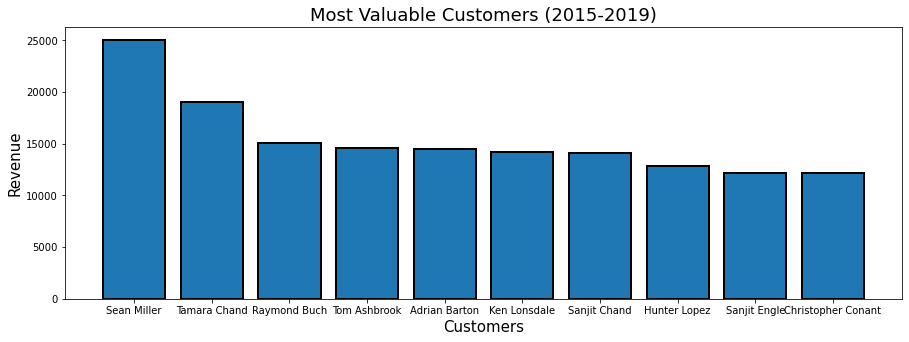

In [17]:
plt.figure(figsize = (15,5)) # width and height of figure is defined in inches
plt.title("Most Valuable Customers (2015-2019)", fontsize=18) 
plt.bar(Top_customers["Customer Name"], Top_customers["Sales"],edgecolor='black', linewidth = 2)
plt.xlabel("Customers",fontsize=15) # x axis shows the customers 
plt.ylabel("Revenue",fontsize=15) # y axis shows the Revenue


Sean Miller,Tamara Chand,Raymond Buch,Tom Ashbrook and Adrian Barton These customers buy more or higher-value products than the average customer. so these are the top 5 most valuable cusromers for the superstore.

### Let's find out which states generated the highest revenue:
  Here are the Top 10 States which generated the highest revenue

In [43]:
# Sort the States as per the sales
Top_states = df.groupby(["State"]).sum().sort_values("Sales", ascending=False).head(10)
# Round off the Sales Value up to 2 decimal places
Top_states = Top_states[["Sales"]].round(2)
# Since we have used groupby, we will have to reset the index to add the states into dataframe
Top_states.reset_index(inplace=True)
Top_states

,State,Sales
0,California,446306.46
1,New York,306361.15
2,Texas,168572.53
3,Washington,135206.85
4,Pennsylvania,116276.65
5,Florida,88436.53
6,Illinois,79236.52
7,Michigan,76136.07
8,Ohio,75130.35
9,Virginia,70636.72


Text(0, 0.5, 'Revenue')

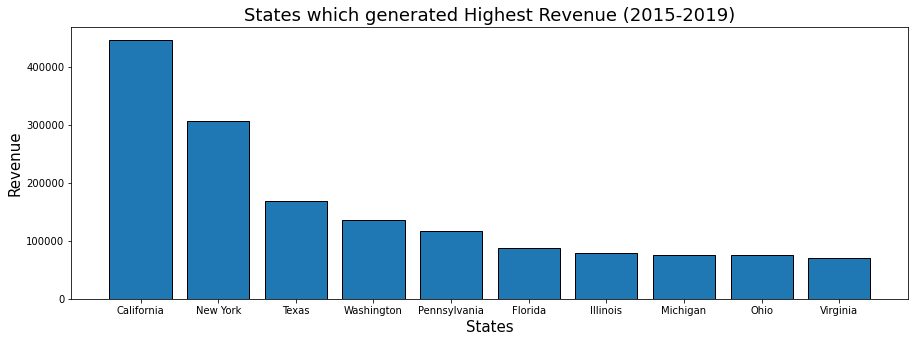

In [44]:
plt.figure(figsize = (15,5)) # width and height of figure is defined in inches
plt.title("States which generated Highest Revenue (2015-2019)", fontsize=18) 
plt.bar(Top_states["State"], Top_states["Sales"],edgecolor='black', linewidth = 1)
plt.xlabel("States",fontsize=15) # x axis shows the States
plt.ylabel("Revenue",fontsize=15) # y axis shows the Revenue

California,New York,Texas,Washington,Pennsylvania,Florida,Illinois,Michigan,Ohio and Virginia
are the top 10 most valuable states. Among all these states california is said to be the most valuable state because it contributes to generate maximum revenue.

### Let's find out which cities generated highest revenue:
Here are the top 10 cities which generated the highest revenue

In [46]:
# Sort the States as per the sales
Top_cities = df.groupby(["City"]).sum().sort_values("Sales", ascending=False).head(10) 
# Round off the Sales Value up to 2 decimal places
Top_cities = Top_cities[["Sales"]].round(2) 
# Since we have used groupby, we will have to reset the index to add the cities into the dataframe
Top_cities.reset_index(inplace=True)
Top_cities

,City,Sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


Text(0, 0.5, 'Revenue')

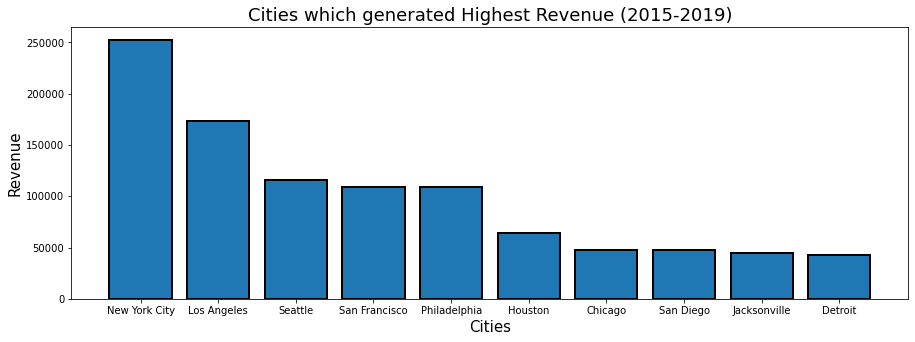

In [47]:
plt.figure(figsize = (15,5)) # width and height of figure is defined in inches
plt.title("Cities which generated Highest Revenue (2015-2019)", fontsize=18)
plt.bar(Top_cities["City"], Top_cities["Sales"],edgecolor='black', linewidth = 2)
plt.xlabel("Cities",fontsize=15)  # x axis shows the States
plt.ylabel("Revenue",fontsize=15)  # y axis shows the Revenue

New York City,Los Angeles,Seattle,San Francisco,Philadelphia,Houston,Chicago,San Diego,Jacksonville and Detroit are the top 10 most valuable cities. Among all these cities New York is said to be the most valuable city because generate maximum revenue.

### Now let's find which category generates maximum revenue?

In [52]:
# Sort the Categories as per the sales
Top_category = df.groupby(["Category"]).sum().sort_values("Sales", ascending=False) 
# keep only the sales column in the dataframe
Top_category = Top_category[["Sales"]]
# Since we have used groupby, we will have to reset the index to add the category into the dataframe
Top_category.reset_index(inplace=True) 
Top_category


,Category,Sales
0,Technology,827455.8730
1,Furniture,728658.5757
2,Office Supplies,705422.3340


<AxesSubplot:xlabel='Category', ylabel='Sales'>

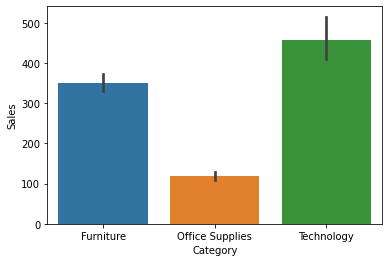

In [26]:
sns.barplot(x='Category',y='Sales',data=df)
# y-axis shows mean of sales value.

As per above details we can observe that Technology category generates the maximum revenue for the superstore.

### Now let's check for Which products contributed most to the revenue?

In [54]:
# Sort the product names as per the sales
Top_products = df.groupby(["Product Name"]).sum().sort_values("Sales",ascending=False).head(10)
# Round off the Sales Value up to 2 decimal places
Top_products = Top_products[["Sales"]].round(2) 
# Since we have used groupby, we will have to reset the index to add the product names into the dataframe
Top_products.reset_index(inplace=True) 
Top_products

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.82
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38
2,Cisco TelePresence System EX90 Videoconferenci...,22638.48
3,HON 5400 Series Task Chairs for Big and Tall,21870.58
4,GBC DocuBind TL300 Electric Binding System,19823.48
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.50
6,Hewlett Packard LaserJet 3310 Copier,18839.69
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.90
8,GBC DocuBind P400 Electric Binding System,17965.07
9,High Speed Automatic Electric Letter Opener,17030.31


As per above details we can observe that the product Canon imageCLASS 2200 Advanced Copier contributes to generates the maximum revenue for the superstore. 
Canon imageCLASS 2200 Advanced Copier belongs to technology category which also generates maximum revenue . so we can say that our analysis is correct.

### Let's look at the revenue generated by each Sub-Category.

In [61]:
# Sort both category and  sub category as per the sales
Top_subcat = df.groupby(['Category','Sub-Category']).sum().sort_values("Sales", ascending=False).head(10)
Top_subcat = Top_subcat[["Sales"]].round(2)
# Sort the values as per Category
Top_subcat = Top_subcat.sort_values("Category")
# Since we have used groupby, we will have to reset the index to add both columns into data frame
Top_subcat.reset_index(inplace=True) 
Top_subcat

,Category,Sub-Category,Sales
0,Furniture,Chairs,322822.73
1,Furniture,Tables,202810.63
2,Furniture,Bookcases,113813.20
3,Office Supplies,Storage,219343.39
4,Office Supplies,Binders,200028.78
5,Office Supplies,Appliances,104618.40
6,Technology,Phones,327782.45
7,Technology,Machines,189238.63
8,Technology,Accessories,164186.70
9,Technology,Copiers,146248.09


Here we can say that from Fruniture Category chairs , from office-supplies category storage and from technology category phones contributes to maximum revenue.

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df['Order ID']

0       CA-2017-152156
1       CA-2017-152156
2       CA-2017-138688
3       US-2016-108966
4       US-2016-108966
             ...      
9795    CA-2017-125920
9796    CA-2016-128608
9797    CA-2016-128608
9798    CA-2016-128608
9799    CA-2016-128608
Name: Order ID, Length: 9800, dtype: object

In [5]:
df['Order ID'].values

array(['CA-2017-152156', 'CA-2017-152156', 'CA-2017-138688', ...,
       'CA-2016-128608', 'CA-2016-128608', 'CA-2016-128608'], dtype=object)

In [6]:
np.array(df['Order ID'])

array(['CA-2017-152156', 'CA-2017-152156', 'CA-2017-138688', ...,
       'CA-2016-128608', 'CA-2016-128608', 'CA-2016-128608'], dtype=object)